In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [18]:
# !pip install folium

In [2]:
df = pd.read_excel("C:/Users/Admin/Downloads/Sales_Data.xlsx")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2588.0,10254.662287,89.420176,10100.00,10178.0000,10261.00,10328.000,10419.00
QUANTITYORDERED,2588.0,34.939722,9.374331,6.00,27.0000,34.00,43.000,97.00
PRICEEACH,2588.0,101.348543,42.372600,28.29,68.5475,95.80,127.745,252.87
ORDERLINENUMBER,2588.0,6.491886,4.236752,1.00,3.0000,6.00,9.000,18.00
SALES,2588.0,3543.204104,1815.930340,553.95,2206.1000,3182.25,4490.410,12536.50
DAYS_SINCE_LASTORDER,2588.0,1763.534776,816.650254,76.00,1082.7500,1769.50,2440.250,3562.00
MSRP,2588.0,100.874807,40.369407,33.00,68.0000,99.00,127.000,214.00


In [7]:
df.shape

(2588, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2588 entries, 0 to 2745
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2588 non-null   int64         
 1   QUANTITYORDERED       2588 non-null   int64         
 2   PRICEEACH             2588 non-null   float64       
 3   ORDERLINENUMBER       2588 non-null   int64         
 4   SALES                 2588 non-null   float64       
 5   ORDERDATE             2588 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2588 non-null   int64         
 7   STATUS                2588 non-null   object        
 8   PRODUCTLINE           2588 non-null   object        
 9   MSRP                  2588 non-null   int64         
 10  PRODUCTCODE           2588 non-null   object        
 11  CUSTOMERNAME          2588 non-null   object        
 12  PHONE                 2588 non-null   object        
 13  ADDRESSLINE1      

In [9]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


<AxesSubplot:xlabel='QUANTITYORDERED'>

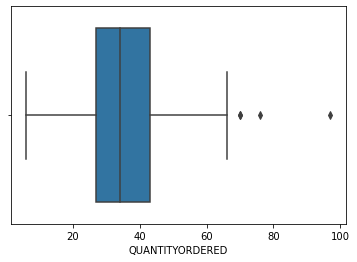

In [10]:
# df.QUANTITYORDERED.boxplot()
sns.boxplot(x='QUANTITYORDERED',data=df)

In [ ]:
# sns.pairplot(df)

<AxesSubplot:>

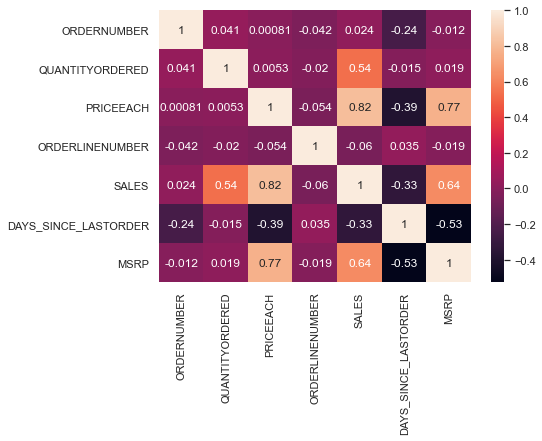

In [11]:
# construct heatmap with only continuous variables
plt.figure(figsize=(7,5))
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot=True)

In [3]:
df.PRODUCTLINE.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

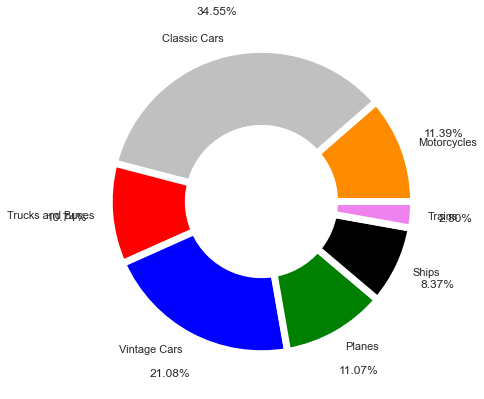

In [4]:
Motorcycles    = df.PRODUCTLINE.value_counts()['Motorcycles']
ClassicCars = df.PRODUCTLINE.value_counts()['Classic Cars']
Trucks    = df.PRODUCTLINE.value_counts()['Trucks and Buses']
Vintage = df.PRODUCTLINE.value_counts()['Vintage Cars']
Planes    = df.PRODUCTLINE.value_counts()['Planes']
Ships = df.PRODUCTLINE.value_counts()['Ships']
Trains    = df.PRODUCTLINE.value_counts()['Trains']


names = ['Motorcycles','Classic Cars','Trucks and Buses','Vintage Cars','Planes','Ships','Trains']
size  = [Motorcycles, ClassicCars,Trucks,Vintage,Planes,Ships,Trains]
# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver','red','blue','green','black','violet'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.5, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [43]:
df=df[(df.STATUS == "Shipped") | (df.STATUS == "Resolved")]

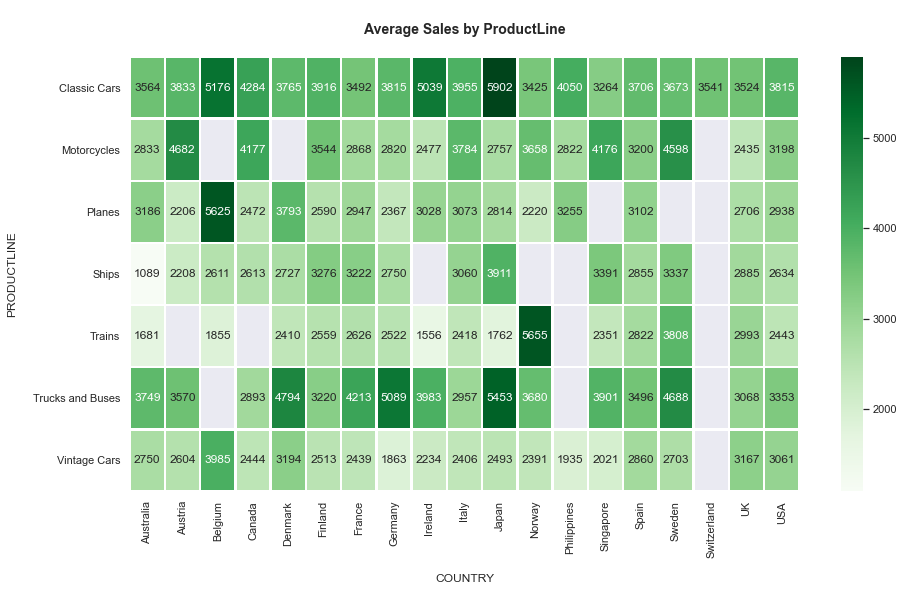

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.groupby(['PRODUCTLINE','COUNTRY']).SALES.median().unstack(), 
            cmap='Greens', annot=True, fmt=".0f",linewidths=1.5)

plt.xlabel('\nCOUNTRY', fontsize=12)
plt.ylabel('PRODUCTLINE\n', fontsize=12)
plt.title('\nAverage Sales by ProductLine\n', fontsize=14, fontweight='bold');

In [38]:
# df2=df[(df.STATUS != "Shipped") & (df.STATUS != "Resolved")]

In [45]:
df['recency_days'] = (df['ORDERDATE'].max() - df['ORDERDATE']) / np.timedelta64(1, 'D')

In [46]:
df1=df.copy()

In [47]:
lastpurchase_day = df1[['CUSTOMERNAME','recency_days']].groupby('CUSTOMERNAME').min().reset_index()
lastpurchase_day.rename(columns={'recency_days':'recency'}, inplace=True)

In [48]:
lastpurchase_day

,CUSTOMERNAME,recency
0,"AV Stores, Co.",182.0
1,Alpha Cognac,50.0
2,Amica Models & Co.,251.0
3,"Anna's Decorations, Ltd",69.0
4,Atelier graphique,174.0
...,...,...
84,"Vida Sport, Ltd",261.0
85,Vitachrome Inc.,194.0
86,"Volvo Model Replicas, Co",190.0
87,West Coast Collectables Co.,474.0


In [49]:
freq = df1[['CUSTOMERNAME','ORDERNUMBER']].groupby(['CUSTOMERNAME']).count().reset_index()
freq.rename(columns = {'ORDERNUMBER':'frequency'}, inplace = True) 

In [50]:
freq

,CUSTOMERNAME,frequency
0,"AV Stores, Co.",51
1,Alpha Cognac,20
2,Amica Models & Co.,26
3,"Anna's Decorations, Ltd",46
4,Atelier graphique,7
...,...,...
84,"Vida Sport, Ltd",31
85,Vitachrome Inc.,25
86,"Volvo Model Replicas, Co",13
87,West Coast Collectables Co.,13


In [51]:
money = df1[['CUSTOMERNAME','SALES']].groupby('CUSTOMERNAME').sum().reset_index()
money.rename(columns = {'SALES':'monetary'}, inplace = True)

In [52]:
money

,CUSTOMERNAME,monetary
0,"AV Stores, Co.",157807.81
1,Alpha Cognac,70488.44
2,Amica Models & Co.,94117.26
3,"Anna's Decorations, Ltd",153996.13
4,Atelier graphique,24179.96
...,...,...
84,"Vida Sport, Ltd",117713.56
85,Vitachrome Inc.,88041.26
86,"Volvo Model Replicas, Co",49494.67
87,West Coast Collectables Co.,46084.64


In [53]:
df2=lastpurchase_day.merge(freq,on='CUSTOMERNAME')
df3=df2.merge(money,on='CUSTOMERNAME')

In [54]:
df3

,CUSTOMERNAME,recency,frequency,monetary
0,"AV Stores, Co.",182.0,51,157807.81
1,Alpha Cognac,50.0,20,70488.44
2,Amica Models & Co.,251.0,26,94117.26
3,"Anna's Decorations, Ltd",69.0,46,153996.13
4,Atelier graphique,174.0,7,24179.96
...,...,...,...,...
84,"Vida Sport, Ltd",261.0,31,117713.56
85,Vitachrome Inc.,194.0,25,88041.26
86,"Volvo Model Replicas, Co",190.0,13,49494.67
87,West Coast Collectables Co.,474.0,13,46084.64


In [55]:
###Calculating quantile values
quintiles = df3[['recency', 'frequency', 'monetary']].quantile([.25,.5, .75, 1.0]).to_dict()
###Benchmark to give score for recency indicator
def r_score(r):
    if r < quintiles['recency'][.25]:
        return 3 
    elif r < quintiles['recency'][.75]:
        return 2
    else: 
        return 1
###Benchmark to give score for frequency & monetary indicator.   
def f_score(f): 
    if f > quintiles['frequency'][.75]:
        return 3
    elif f > quintiles['frequency'][.25]: 
        return 2
    else: 
        return 1
def m_score(m): 
    if m > quintiles['monetary'][.75]:
        return 3
    elif m > quintiles['monetary'][.25]: 
        return 2
    else: 
        return 1

In [56]:
rfm2 = df3.copy()
rfm2['r_score'] = rfm2.recency.apply(lambda x: r_score(x))
rfm2['f_score'] = rfm2.frequency.apply(lambda x: f_score(x))
rfm2['m_score'] = rfm2.monetary.apply(lambda x: m_score(x))
rfm2['rfm'] = rfm2['r_score'].map(str)+rfm2['f_score'].map(str) + rfm2['m_score'].map(str)

In [57]:
rfm2.head()

,CUSTOMERNAME,recency,frequency,monetary,r_score,f_score,m_score,rfm
0,"AV Stores, Co.",182.0,51,157807.81,2,3,3,233
1,Alpha Cognac,50.0,20,70488.44,3,2,2,322
2,Amica Models & Co.,251.0,26,94117.26,1,2,2,122
3,"Anna's Decorations, Ltd",69.0,46,153996.13,3,3,3,333
4,Atelier graphique,174.0,7,24179.96,2,1,1,211


In [58]:
rfm2_group1 = rfm2[rfm2['rfm']=='333']
rfm2_group1['label'] = 'platinum'

<ipython-input-58-b84e007d437c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_group1['label'] = 'platinum'


In [59]:
rfm2_group1

,CUSTOMERNAME,recency,frequency,monetary,r_score,f_score,m_score,rfm,label
3,"Anna's Decorations, Ltd",69.0,46,153996.13,3,3,3,333,platinum
30,"Dragon Souveniers, Ltd.",76.0,43,172989.68,3,3,3,333,platinum
32,Euro Shopping Channel,14.0,231,795328.22,3,3,3,333,platinum
41,L'ordine Souveniers,7.0,39,142601.33,3,3,3,333,platinum
53,Mini Gifts Distributors Ltd.,55.0,178,647596.31,3,3,3,333,platinum
63,Reims Collectables,48.0,41,135042.94,3,3,3,333,platinum
67,Salzburg Collectables,0.0,40,149798.63,3,3,3,333,platinum


In [60]:
rfm2_group2 = rfm2[rfm2['rfm']=='211']
rfm2_group2['label'] = 'verge of churn'
rfm2_group2

<ipython-input-60-cd4b3774b888>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_group2['label'] = 'verge of churn'


,CUSTOMERNAME,recency,frequency,monetary,r_score,f_score,m_score,rfm,label
4,Atelier graphique,174.0,7,24179.96,2,1,1,211,verge of churn
7,"Australian Gift Network, Co",105.0,15,59469.12,2,1,1,211,verge of churn
8,Auto Assoc. & Cie.,219.0,18,64834.32,2,1,1,211,verge of churn
10,Auto-Moto Classics Inc.,166.0,8,26479.26,2,1,1,211,verge of churn
40,"Iberia Gift Imports, Corp.",224.0,15,54723.62,2,1,1,211,verge of churn
48,Microscale Inc.,196.0,10,33144.93,2,1,1,211,verge of churn
66,Royale Belge,128.0,8,33440.10,2,1,1,211,verge of churn
86,"Volvo Model Replicas, Co",190.0,13,49494.67,2,1,1,211,verge of churn


In [61]:
rfm2_group3 = rfm2[rfm2['rfm']=='111']
rfm2_group3['label'] = 'lost'
rfm2_group3

<ipython-input-61-cd459a75ff1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_group3['label'] = 'lost'


,CUSTOMERNAME,recency,frequency,monetary,r_score,f_score,m_score,rfm,label
5,"Australian Collectables, Ltd",320.0,18,50213.37,1,1,1,111,lost
12,"Bavarian Collectables Imports, Co.",245.0,14,34993.92,1,1,1,111,lost
15,CAF Imports,425.0,13,49642.05,1,1,1,111,lost
16,Cambridge Collectables Co.,375.0,11,36163.62,1,1,1,111,lost
20,"Clover Collections, Co.",244.0,16,57756.43,1,1,1,111,lost
29,"Double Decker Gift Stores, Ltd",481.0,12,36019.04,1,1,1,111,lost
36,Gifts4AllAges.com,250.0,12,34892.99,1,1,1,111,lost
58,Online Mini Collectables,250.0,15,57197.96,1,1,1,111,lost
70,Signal Collectibles Ltd.,462.0,15,50218.51,1,1,1,111,lost
77,Tekni Collectables Inc.,365.0,9,36709.19,1,1,1,111,lost


In [62]:
rfm2_group4 = rfm2[rfm2['rfm']=='233']
rfm2_group4['label'] = 'loyal'
rfm2_group4

<ipython-input-62-fe0b07508789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm2_group4['label'] = 'loyal'


,CUSTOMERNAME,recency,frequency,monetary,r_score,f_score,m_score,rfm,label
0,"AV Stores, Co.",182.0,51,157807.81,2,3,3,233,loyal
6,"Australian Collectors, Co.",170.0,55,200995.41,2,3,3,233,loyal
26,Danish Wholesale Imports,189.0,33,119028.73,2,3,3,233,loyal
43,La Rochelle Gifts,104.0,40,136340.21,2,3,3,233,loyal
44,Land of Toys Inc.,184.0,35,118711.78,2,3,3,233,loyal
55,Muscle Machine Inc,168.0,48,197736.94,2,3,3,233,loyal
57,Online Diecast Creations Co.,195.0,34,131685.30,2,3,3,233,loyal
64,Rovelli Gifts,187.0,48,137955.72,2,3,3,233,loyal
76,Technics Stores Inc.,133.0,34,120783.07,2,3,3,233,loyal
